In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [6]:
raw_df = pd.read_csv('WEATHERAUS/weatherAUS.csv')

In [7]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
raw_df.dropna(subset= 'RainTomorrow',inplace = True)

In [10]:
raw_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [11]:
raw_df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<Axes: title={'center': 'No of Rows per Year'}, xlabel='Date', ylabel='count'>

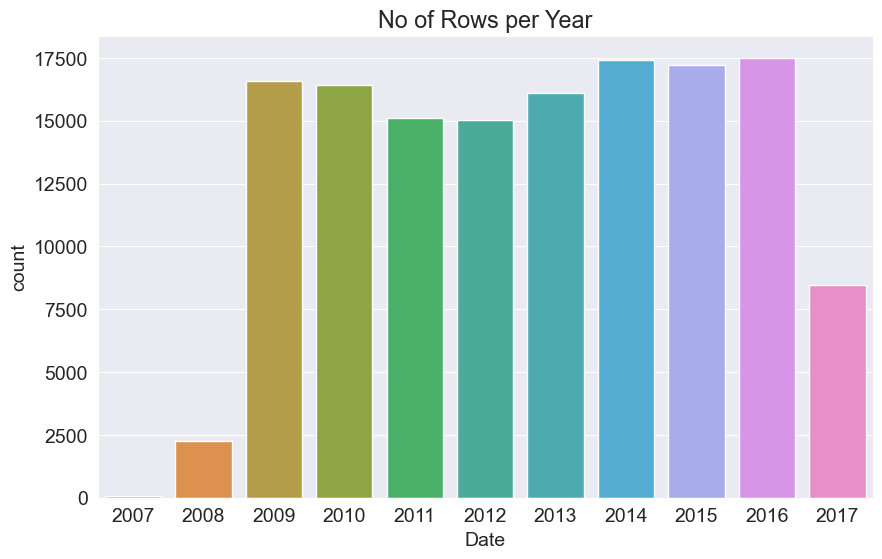

In [12]:
plt.title('No of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [13]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year< 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [14]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(98988, 23)
(17231, 23)
(25974, 23)


In [15]:
input_cols = list(train_df.columns)[1:-1]
target_cols = 'RainTomorrow'

In [16]:
train_input = train_df[input_cols].copy()
train_target = train_df[target_cols].copy()

In [17]:
test_input = test_df[input_cols].copy()
test_target = test_df[target_cols].copy()

In [18]:
val_input = val_df[input_cols].copy()
val_target = val_df[target_cols].copy()

In [19]:
numeric_cols = train_input.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_input.select_dtypes(include= 'object').columns.tolist()

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [22]:
train_input[numeric_cols] = imputer.transform(train_input[numeric_cols])
val_input[numeric_cols] = imputer.transform(val_input[numeric_cols])
test_input[numeric_cols] = imputer.transform(test_input[numeric_cols])

In [23]:
train_input[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [26]:
train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
val_input[numeric_cols] = scaler.transform(val_input[numeric_cols])
test_input[numeric_cols] = scaler.transform(test_input[numeric_cols])

In [27]:
train_input.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.0,0.013233,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0304,0.0,0.0,0.027426,0.005758
max,1.0,1.000000,1.0,0.568276,0.986207,1.0,0.669231,1.0,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,0.988484


In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [29]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
val_input[encoded_cols] = encoder.transform(val_input[categorical_cols])
test_input[encoded_cols] = encoder.transform(test_input[categorical_cols])

C:\Users\dell\AppData\Local\Temp\ipykernel_14764\1510100122.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
C:\Users\dell\AppData\Local\Temp\ipykernel_14764\1510100122.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
C:\Users\dell\AppData\Local\Temp\ipykernel_14764\1510100122.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling

In [30]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [31]:
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [32]:
train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
val_input[encoded_cols] = encoder.transform(val_input[categorical_cols])
test_input[encoded_cols] = encoder.transform(test_input[categorical_cols])

In [33]:
test_input

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,NaN,ESE,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [34]:
X_train = train_input[numeric_cols+encoded_cols]
x_val = val_input[numeric_cols+encoded_cols]
x_test = test_input[numeric_cols+encoded_cols]

In [35]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_target)

DecisionTreeClassifier(random_state=42)

In [36]:
from sklearn.metrics import accuracy_score

train_preds = model.predict(X_train)
val_preds = model.predict(x_val)
test_preds = model.predict(x_test)



In [37]:
train_accuracy = accuracy_score(train_target, train_preds)
val_accuracy = accuracy_score(val_target, val_preds)
test_accuracy = accuracy_score(test_target, test_preds)

In [38]:
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Validation Accuracy: 0.7921
Test Accuracy: 0.7741


In [39]:
param_grid = {'max_depth': [2, 5, 10, 15, 20, 25, 30]}

In [40]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, train_target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 5, 10, 15, 20, 25, 30]},
             scoring='accuracy')

In [41]:
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

Best max_depth: 5


In [42]:
tuned_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
tuned_model.fit(X_train, train_target)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [43]:
tuned_train_preds = tuned_model.predict(X_train)
tuned_val_preds = tuned_model.predict(x_val)
tuned_test_preds = tuned_model.predict(x_test)

In [44]:
tuned_train_accuracy = accuracy_score(train_target, tuned_train_preds)
tuned_val_accuracy = accuracy_score(val_target, tuned_val_preds)
tuned_test_accuracy = accuracy_score(test_target, tuned_test_preds)

In [45]:
print(f"Tuned Training Accuracy: {tuned_train_accuracy:.4f}")
print(f"Tuned Validation Accuracy: {tuned_val_accuracy:.4f}")
print(f"Tuned Test Accuracy: {tuned_test_accuracy:.4f}")

Tuned Training Accuracy: 0.8393
Tuned Validation Accuracy: 0.8409
Tuned Test Accuracy: 0.8286


In [46]:
param_grid_extended = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [47]:
grid_search_extended = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_extended, cv=5, scoring='accuracy')
grid_search_extended.fit(X_train, train_target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [48]:
best_params_extended = grid_search_extended.best_params_
print(f"Best parameters: {best_params_extended}")

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [49]:
tuned_model_extended = DecisionTreeClassifier(**best_params_extended, random_state=42)
tuned_model_extended.fit(X_train, train_target)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [50]:
tuned_train_preds_extended = tuned_model_extended.predict(X_train)
tuned_val_preds_extended = tuned_model_extended.predict(x_val)
tuned_test_preds_extended = tuned_model_extended.predict(x_test)

In [51]:
tuned_train_accuracy_extended = accuracy_score(train_target, tuned_train_preds_extended)
tuned_val_accuracy_extended = accuracy_score(val_target, tuned_val_preds_extended)
tuned_test_accuracy_extended = accuracy_score(test_target, tuned_test_preds_extended)

In [52]:
importance_df = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': tuned_model_extended.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance_df

,Features,Importance
9,Humidity3pm,0.685509
2,Rainfall,0.117843
5,WindGustSpeed,0.071593
11,Pressure3pm,0.052950
4,Sunshine,0.052901
13,Cloud3pm,0.010013
14,Temp9am,0.006316
118,RainToday_nan,0.001670
39,Location_MountGinini,0.001205
80,WindGustDir_WSW,0.000000


In [53]:
print(f"Tuned Training Accuracy (Extended): {tuned_train_accuracy_extended:.4f}")
print(f"Tuned Validation Accuracy (Extended): {tuned_val_accuracy_extended:.4f}")
print(f"Tuned Test Accuracy (Extended): {tuned_test_accuracy_extended:.4f}")

Tuned Training Accuracy (Extended): 0.8393
Tuned Validation Accuracy (Extended): 0.8409
Tuned Test Accuracy (Extended): 0.8286


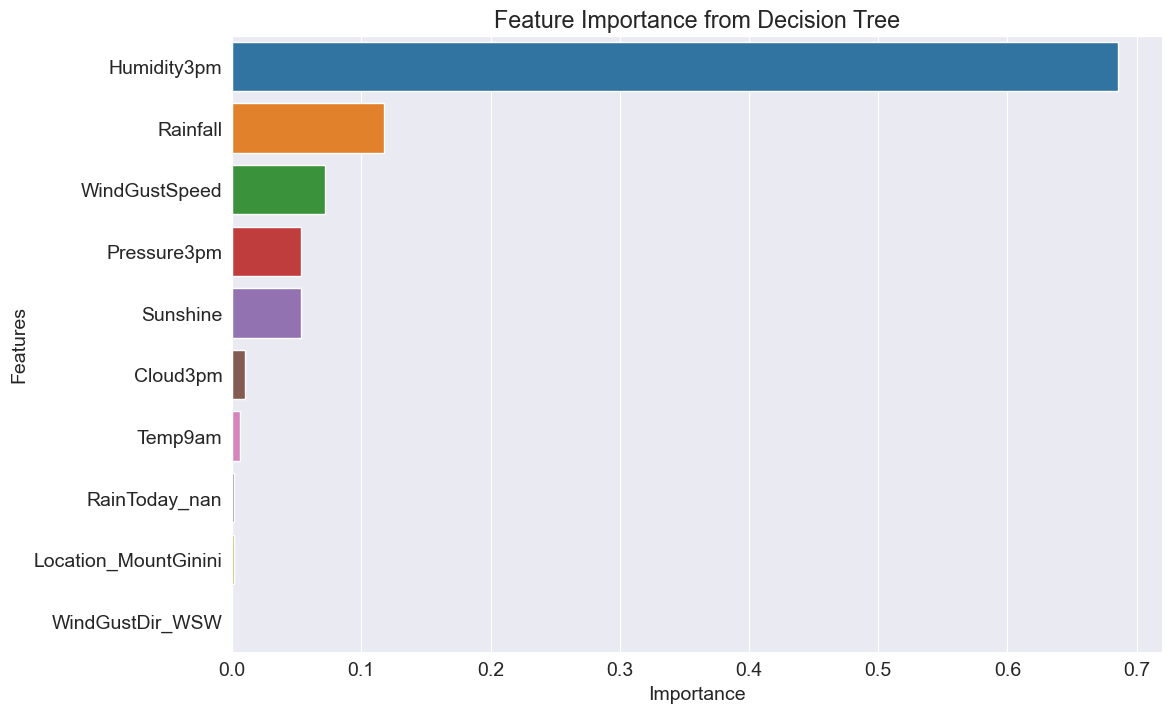

In [54]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Features', data=importance_df.head(10))
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

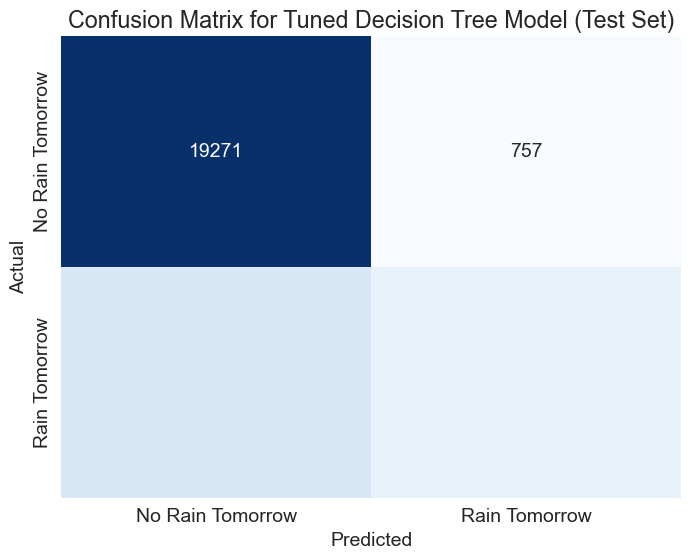

In [55]:
# prompt: generate confusion metrics

from sklearn.metrics import confusion_matrix

# Generate confusion matrix for the tuned model on the test set
cm = confusion_matrix(test_target, tuned_test_preds_extended)

# Display the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain Tomorrow', 'Rain Tomorrow'],
            yticklabels=['No Rain Tomorrow', 'Rain Tomorrow'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned Decision Tree Model (Test Set)')
plt.show()

In [56]:
# prompt: generate classifiction report

from sklearn.metrics import classification_report

# Generate classification report for the tuned model on the test set
report = classification_report(test_target, tuned_test_preds_extended, target_names=['No Rain Tomorrow', 'Rain Tomorrow'])

# Print the classification report
report

'                  precision    recall  f1-score   support\n\nNo Rain Tomorrow       0.84      0.96      0.90     20028\n   Rain Tomorrow       0.75      0.38      0.50      5946\n\n        accuracy                           0.83     25974\n       macro avg       0.79      0.67      0.70     25974\n    weighted avg       0.82      0.83      0.81     25974\n'

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs= -1, random_state=42)
rf.fit(X_train, train_target)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [58]:
train_pred_rf = rf.predict(X_train)
val_pred_rf = rf.predict(x_val)
test_pred_rf = rf.predict(x_test)

In [59]:
train_pred_rf_accuracy = accuracy_score(train_target, train_pred_rf)
val_pred_rf_accuracy = accuracy_score(val_target, val_pred_rf)
test_pred_rf_accuracy = accuracy_score(test_target, test_pred_rf)

In [60]:
print(train_pred_rf_accuracy)
print(val_pred_rf_accuracy)
print(test_pred_rf_accuracy)

0.9999494888269285
0.8566537055307295
0.8447678447678447


You can save your trained model to a pickle file using the `pickle` library. This allows you to load the model later without having to retrain it.

In [61]:
import pickle

# Define the filename for your model
model_filename = 'decision_tree_model.pkl'

# Save the tuned Decision Tree model to the pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)

print(f"Model saved to {model_filename}")

Model saved to decision_tree_model.pkl


In [62]:
# prompt: create pipeline with rf as model, and preprocessing steps as encoding and scaling

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Recreate the lists of columns based on the training data before manual preprocessing
# The original dataframes (train_df, val_df, test_df) are available

numeric_cols_original = train_df[input_cols].select_dtypes(include = np.number).columns.tolist()
categorical_cols_original = train_df[input_cols].select_dtypes(include= 'object').columns.tolist()


# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols_original),
        ('cat', categorical_transformer, categorical_cols_original)
    ],
    remainder='passthrough' # Keep other columns if they exist
)

# Define the pipeline with preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Now, fit the pipeline on the original training data (before manual preprocessing)
# Make sure to separate features and target from the original dataframes
X_train_original = train_df[input_cols].copy()
y_train_original = train_df[target_cols].copy()
X_val_original = val_df[input_cols].copy()
y_val_original = val_df[target_cols].copy()
X_test_original = test_df[input_cols].copy()
y_test_original = test_df[target_cols].copy()


# Fit the pipeline
pipeline.fit(X_train_original, y_train_original)

# Make predictions using the pipeline
train_preds_pipe = pipeline.predict(X_train_original)
val_preds_pipe = pipeline.predict(X_val_original)
test_preds_pipe = pipeline.predict(X_test_original)

# Evaluate the pipeline
train_accuracy_pipe = accuracy_score(y_train_original, train_preds_pipe)
val_accuracy_pipe = accuracy_score(y_val_original, val_preds_pipe)
test_accuracy_pipe = accuracy_score(y_test_original, test_preds_pipe)

print(f"Pipeline Training Accuracy: {train_accuracy_pipe:.4f}")
print(f"Pipeline Validation Accuracy: {val_accuracy_pipe:.4f}")
print(f"Pipeline Test Accuracy: {test_accuracy_pipe:.4f}")

# You can also save the entire pipeline
pipeline_filename = 'random_forest_pipeline.pkl'
with open(pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

print(f"Pipeline saved to {pipeline_filename}")

Pipeline Training Accuracy: 1.0000
Pipeline Validation Accuracy: 0.8561
Pipeline Test Accuracy: 0.8450
Pipeline saved to random_forest_pipeline.pkl
